<a id = 'top'></a>

# A quick-start guide to Keras
  * A. [What is Keras?](#introToKeras) 
  * B. [Basic Operations](#kerasBasicOps)  
      * 1. [Sequential interface](#sequentialInterface)
      * 2. [Creating a model](#createModel)
      * 3. [Compiling a model](#compileModel)
      * 4. [Training a model](#trainModel)
      * 5. [Saving a model](#saveModel)
      * 6. [Reloading a model](#reloadModel)
  * C. [Defining your model inside a function to add flexibility](#functionWrapper)

[Return to Top](#top)
<a id = 'introToKeras'></a>
## A. What is Keras?

[Keras](https://en.wikipedia.org/wiki/Keras) is a front-end interface to Tensorflow.  Keras has its own [documentation](https://keras.io/about/) and is also well-documented in [tensorflow keras documentation](https://www.tensorflow.org/api_docs/python/tf/keras).  

Using the Keras interface greatly simplifies the task of constructing, training and using tensorflow models.  In this notebook we'll build and train a basic fully-connected neural net and learn some of the important operations available within Keras.  We'll use the [sequential-model syntax](https://keras.io/guides/sequential_model/), which is useful when becoming familiar with Keras and appropriate for models where each layer has a single output feeding sequentially to the next layer.  

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

1.14.0


[Return to Top](#top)
<a id = 'kerasBasicOps'></a>
## B. Basic Operations in Keras

1. Construct the model graph from model input, model layers
2. Build the model (from input, output of the graph)
3. Compile the model with optimizer, metric set, loss function
4. Fit the model / evaluate the model
5. Save the model and re-use the model

[Return to Top](#top)
<a id = 'sequentialInterface'></a>
### B1. Sequential interface

[Return to Top](#top)
<a id = 'createModel'></a>
### B2. Creating a model

In [3]:
hidden_units = 200
model = keras.Sequential(
    [keras.Input(shape=(2,)),
     keras.layers.Dense(200, activation="relu", name="h1_layer"),
     keras.layers.Dense(100, activation="relu", name="h2_layer"),
     keras.layers.Dense(2, activation="sigmoid", name="output_layer"),
    ]
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


[Return to Top](#top)
<a id = 'compileModel'></a>
### B3. Compiling a model

In [4]:
# Define loss function, optimizer, and accuracy
# Here we're using some basic loss, optimizer, metrics provided by Keras, all of which use reasonable defaults.

# However if you want to adjust things like learning rate you'll want to use the full Keras functional version of these to have ability to change
# ... the arguments from their default values.

loss = "sparse_categorical_crossentropy"    # Using sparse crossentropy when your class values are defined by unique labels.  Alternatively, using
#                                             ...categorical_crossentropy requires your labels to be in one-hot vector format.
optimizer = "adam"       # adam is an optimizer we'll use a lot
metrics = ["sparse_categorical_accuracy"] # This is a better accuracy metric to use
# ...as there is a bug in "accuracy" metric preventing re-loaded model from calculating 
# ...correct accuracy

model.compile(loss = loss, optimizer = optimizer, metrics = metrics)

[Return to Top](#top)
<a id = 'trainModel'></a>
### B4. Training a model

#### Define the dataset

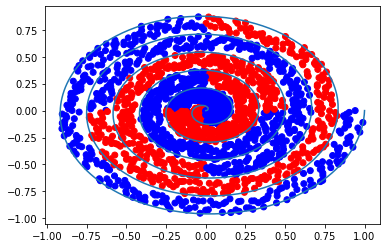

In [5]:
# Let's look at some data and labels:

import matplotlib.pyplot as plt
import numpy as np
nrotate =  6
size = 2040
theta = np.linspace(start = 0, stop = nrotate * 2 * np.pi, num = size)
len(theta)
r = 1/(nrotate * 2 * np.pi) * theta
x = r * np.cos(theta)
y = r * np.sin(theta)
# Toggle the below line to see the dividing line between groups
plt.plot(x, y)
# thickness = 1/(nrotate * 2 * np.pi) * 2 pi = 1 / nrotate
1 / nrotate * np.random.uniform(size = 100)
eps = 0.8
nparts = 4
colors = []
for i in range(nparts):
    colors.extend(['r']*int(size / (2*nparts)) + ['b']*int(size / (2*nparts)))
labels = ['r']*int(size/nparts) + ['b']*int(size/nparts)+['r']*int(size/nparts) + ['b']*int(size/nparts)
rjitter = r - eps / nrotate * np.random.uniform(size = size)
xjitter = rjitter*np.cos(theta)
yjitter = rjitter*np.sin(theta)
plt.scatter(xjitter, yjitter, color = colors)

In [6]:
from sklearn.model_selection import train_test_split
# Convert our data to numpy arrays with correct shapes for our model input, output
datain = np.transpose(np.vstack([x,y]))
labels = np.array([1 if color=='b' else 0 for color in colors]).reshape([-1,1])

# Create training, eval split
train_input, test_input, train_labels, test_labels = train_test_split(datain, labels, test_size = 0.2, 
                                                         random_state = 41,
                                                         shuffle = True)
# Train the model using our training input, labels
## the validation_split arguments states that 20% of the training data is to be used
## ...as dev data.
model.fit(train_input, train_labels, batch_size = 400, validation_split=0.2, epochs = 300)

Train on 1305 samples, validate on 327 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/300
1305/1305 [==============================] - 1s 632us/sample - loss: 0.6906 - sparse_categorical_accuracy: 0.5739 - val_loss: 0.6902 - val_sparse_categorical_accuracy: 0.5168
Epoch 2/300
1305/1305 [==============================] - 0s 37us/sample - loss: 0.6846 - sparse_categorical_accuracy: 0.5831 - val_loss: 0.6879 - val_sparse_categorical_accuracy: 0.5596
Epoch 3/300
1305/1305 [==============================] - 0s 77us/sample - loss: 0.6796 - sparse_categorical_accuracy: 0.6268 - val_loss: 0.6855 - val_sparse_categorical_accuracy: 0.6177
Epoch 4/300
1305/1305 [==============================] - 0s 33us/sample - loss: 0.6745 - sparse_categorical_accuracy: 0.6720 - val_loss: 0.6832 - val_sparse_categorical_accuracy: 0.6269
Epoch 5/300
1305/1305 [==============================] - 0s 31us/sample - loss: 0.6694 - sparse_categorical_accura

In [13]:
# Evaluate the data with our test_input, test_labels
model.evaluate(test_input, test_labels)

408/408 [==============================] - 0s 158us/sample - loss: 0.2150 - sparse_categorical_accuracy: 0.9118


[0.2149697290916069, 0.9117647]

[Return to Top](#top)
<a id = 'saveModel'></a>
### B5. Saving a model

In [26]:
# Saving the model
model.save("./keras_qs_model")

[Return to Top](#top)
<a id = 'reloadModel'></a>
### B6. Reloading a model

In [27]:
# Ensure that reloaded model evaluates to same score as when we saved it originally.
model2 = keras.models.load_model("./keras_qs_model")
model2.evaluate(train_input, train_labels)

ValueError: You are trying to load a weight file containing 3 layers into a model with 0 layers.

[Return to Top](#top)
<a id = 'functionWrapper'></a>
## C. Defining your model inside a function to add flexibility

In [23]:
# If you want to re-run your model with different settings and hyper-parameters there's a good chance you'll benefit by using a class definition.

# Define parameters in a dictionary
modelparams = dict(
    layers = ( (200, 'relu'), (100, 'relu') ), 
    n_classes = 2, # number of output classes -- 2 for binary
    learning_rate = 0.01, 
    output_activation = "sigmoid",
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["sparse_categorical_accuracy"]
)


def basic_km(**kwargs):
    layers = kwargs.get('layers', ((10, 'relu')) ) 
    n_classes = kwargs.get('n_classes', 2)
    learning_rate = kwargs.get('learning_rate', 0.01)
    output_activation = kwargs.get('output_activation', "sigmoid")
    optimizer = kwargs.get('optimizer', "adam")
    loss = kwargs.get('loss', "categorical_crossentropy")
    metrics = kwargs.get('metrics', ["accuracy"])
    
    num_layers = len(layers)
    
    graph = []
    # Define input shape
    graph.append(keras.Input(shape=(2,)))
    # Add hidden layers
    for i, layer in enumerate(layers):
        graph.append(keras.layers.Dense(layer[0], activation = layer[1], name = "h" + str(i+1) + "layer"   ))
    # Add output layer
    graph.append(keras.layers.Dense(n_classes, activation = output_activation, name="output_layer"))
    
    # Define a sequential model from inputs and outputs of graph
    model = keras.Sequential(graph)
    
    # Compile the model
    model.compile(loss = loss, optimizer = optimizer, metrics = metrics)
    return model

modelFromDef = basic_km(**modelparams)

# Train model 
modelFromDef.fit(train_input, train_labels, batch_size = 400, validation_split=0.2, epochs = 300)    
        

TypeError: The added layer must be an instance of class Layer. Found: Tensor("input_3:0", shape=(?, 2), dtype=float32)